<a href="https://colab.research.google.com/github/hecescam/IA3/blob/main/Hunger_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

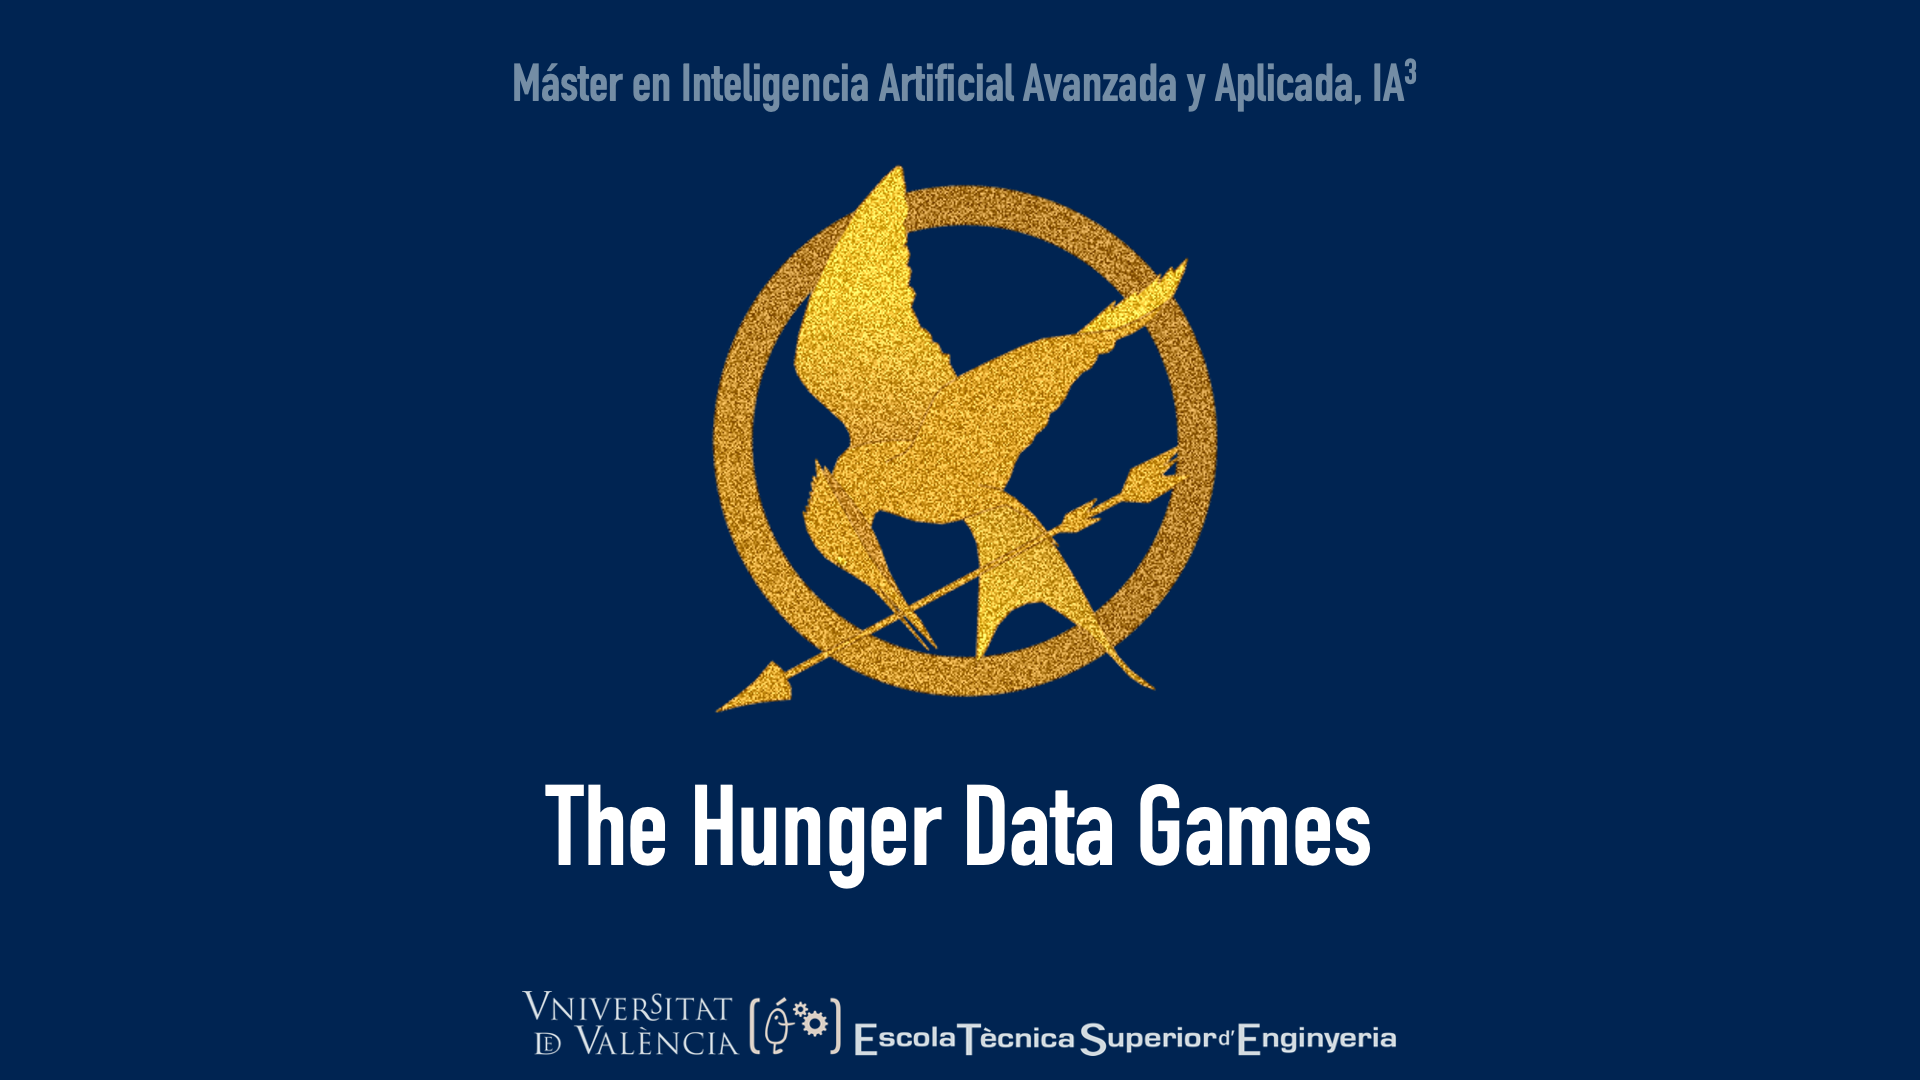

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



## Import Libraries and Loading the Dataset

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score,balanced_accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

#url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/hunger_data.csv"
url ='https://raw.githubusercontent.com/hecescam/IA3/main/glass.csv'
dataframe = pd.read_csv(url,header=0)
#dataframe.drop("Unnamed: 0", axis=1, inplace=True)

dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [165]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

## Dataframe size

In [166]:
dataframe.shape

(214, 10)

In [167]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  214 non-null    float64
 1   sodium            214 non-null    float64
 2   magnesium         214 non-null    float64
 3   aluminum          214 non-null    float64
 4   silicon           214 non-null    float64
 5   potassium         214 non-null    float64
 6   calcium           214 non-null    float64
 7   barium            214 non-null    float64
 8   iron              214 non-null    float64
 9   type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
dataframe['type_of_glass'] = dataframe['type_of_glass'].astype('str')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  214 non-null    float64
 1   sodium            214 non-null    float64
 2   magnesium         214 non-null    float64
 3   aluminum          214 non-null    float64
 4   silicon           214 non-null    float64
 5   potassium         214 non-null    float64
 6   calcium           214 non-null    float64
 7   barium            214 non-null    float64
 8   iron              214 non-null    float64
 9   type_of_glass     214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


## Descriptive statistics

In [168]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## We check for null data

In [9]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

## We separate the features and the target in different dataframes
### - Dataframe features ("matrix X")

In [169]:
X=dataframe.drop(columns='type_of_glass')
X

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### - Dataframe target variable ('Y')

In [170]:
Y=dataframe.loc[:,['type_of_glass']]
Y

,type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


## Correlation of features

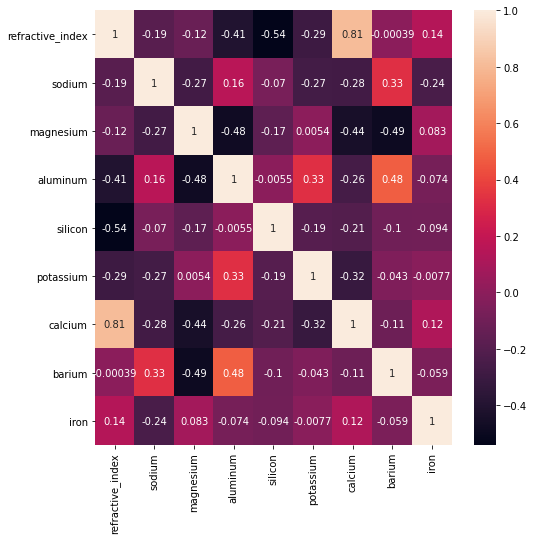

In [12]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Calcium and refractive_index have a high linear correlation 

## Target variable distribution (Class Balance Analysis)


In [13]:
Y['type_of_glass'].unique()

array(['1', '2', '3', '5', '6', '7'], dtype=object)

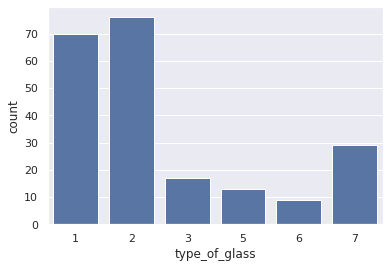

2    76
1    70
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64


In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x=Y['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(Y['type_of_glass'], sort = True))

### -There are unbalanced classes and there is no class 4

## Visualize data distribution

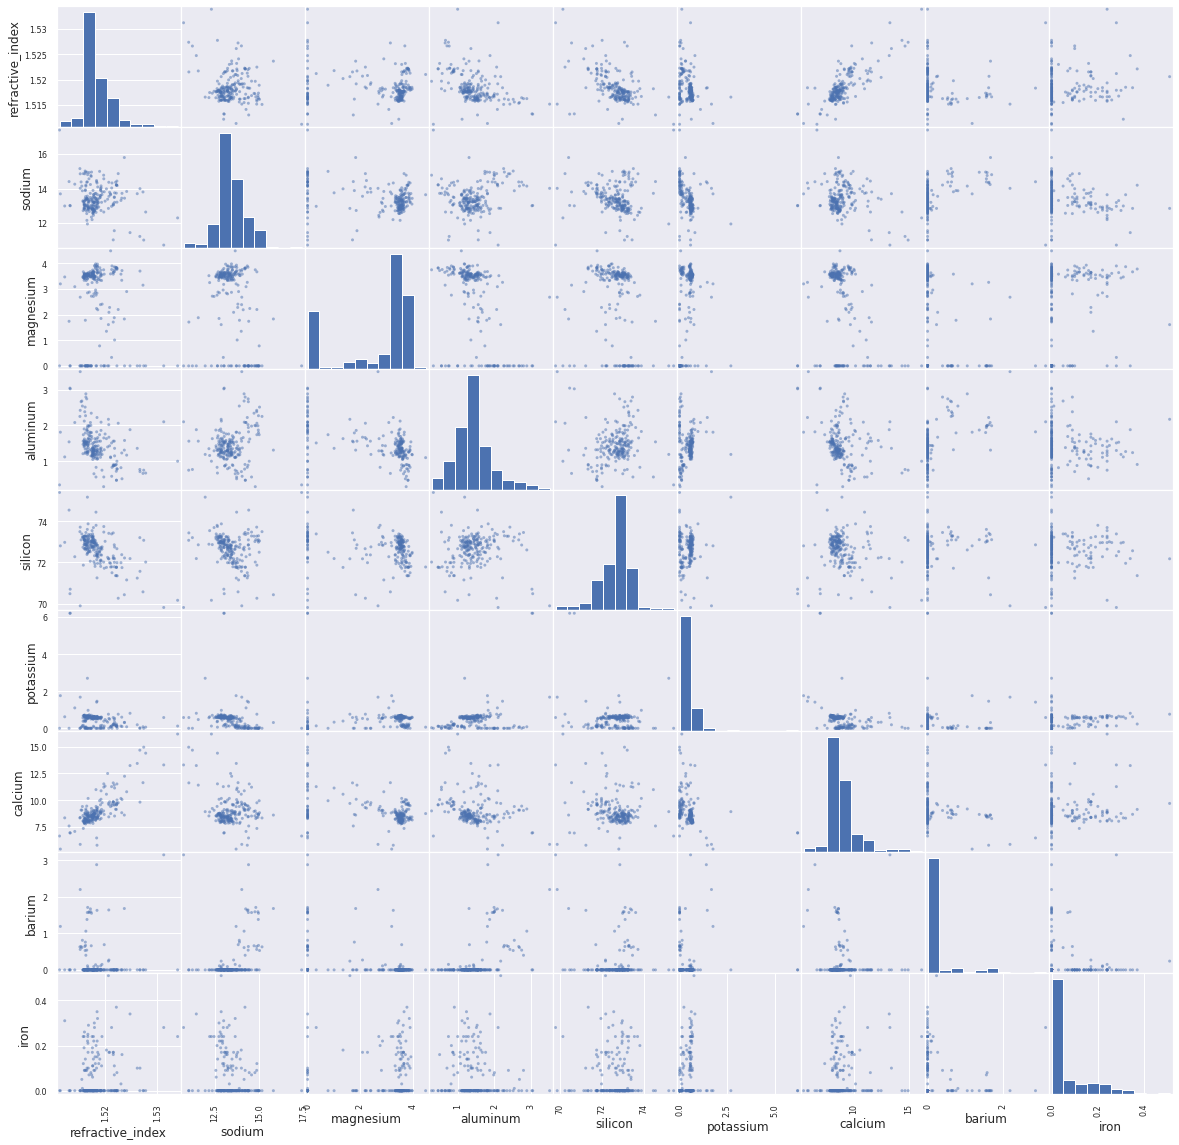

In [15]:
pd.plotting.scatter_matrix(X, figsize=(20.0,20.0)); 

In [16]:
fig = px.scatter_matrix(data_frame=dataframe, dimensions=X.columns, color="type_of_glass")
fig.show()
#fig = px.scatter_matrix()

### - Visualize features with high linear correlation ('calcium', 'refractive_index')

In [17]:
fig = px.scatter(dataframe, x="calcium", y="refractive_index" , color="type_of_glass")
fig.show()

## Outlier Analysis

In [18]:
fig = make_subplots(rows=5, cols=2,column_widths=[5,5],row_heights=[100,100,100,100,100],specs=[[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},None]],vertical_spacing=0.075,horizontal_spacing=0.08)

n=0
for i in range(1,6):
  for j in range(1,3):
    fig.append_trace(go.Box(x = np.array(Y['type_of_glass']), y = np.array(X[X.columns[n]]),boxpoints='all',name=X.columns[n]), row = i, col = j)
    n+=1
    if n==len(X.columns):
      break

fig.update_layout(title_text="OUTLIER ANALYSIS")
fig.show()

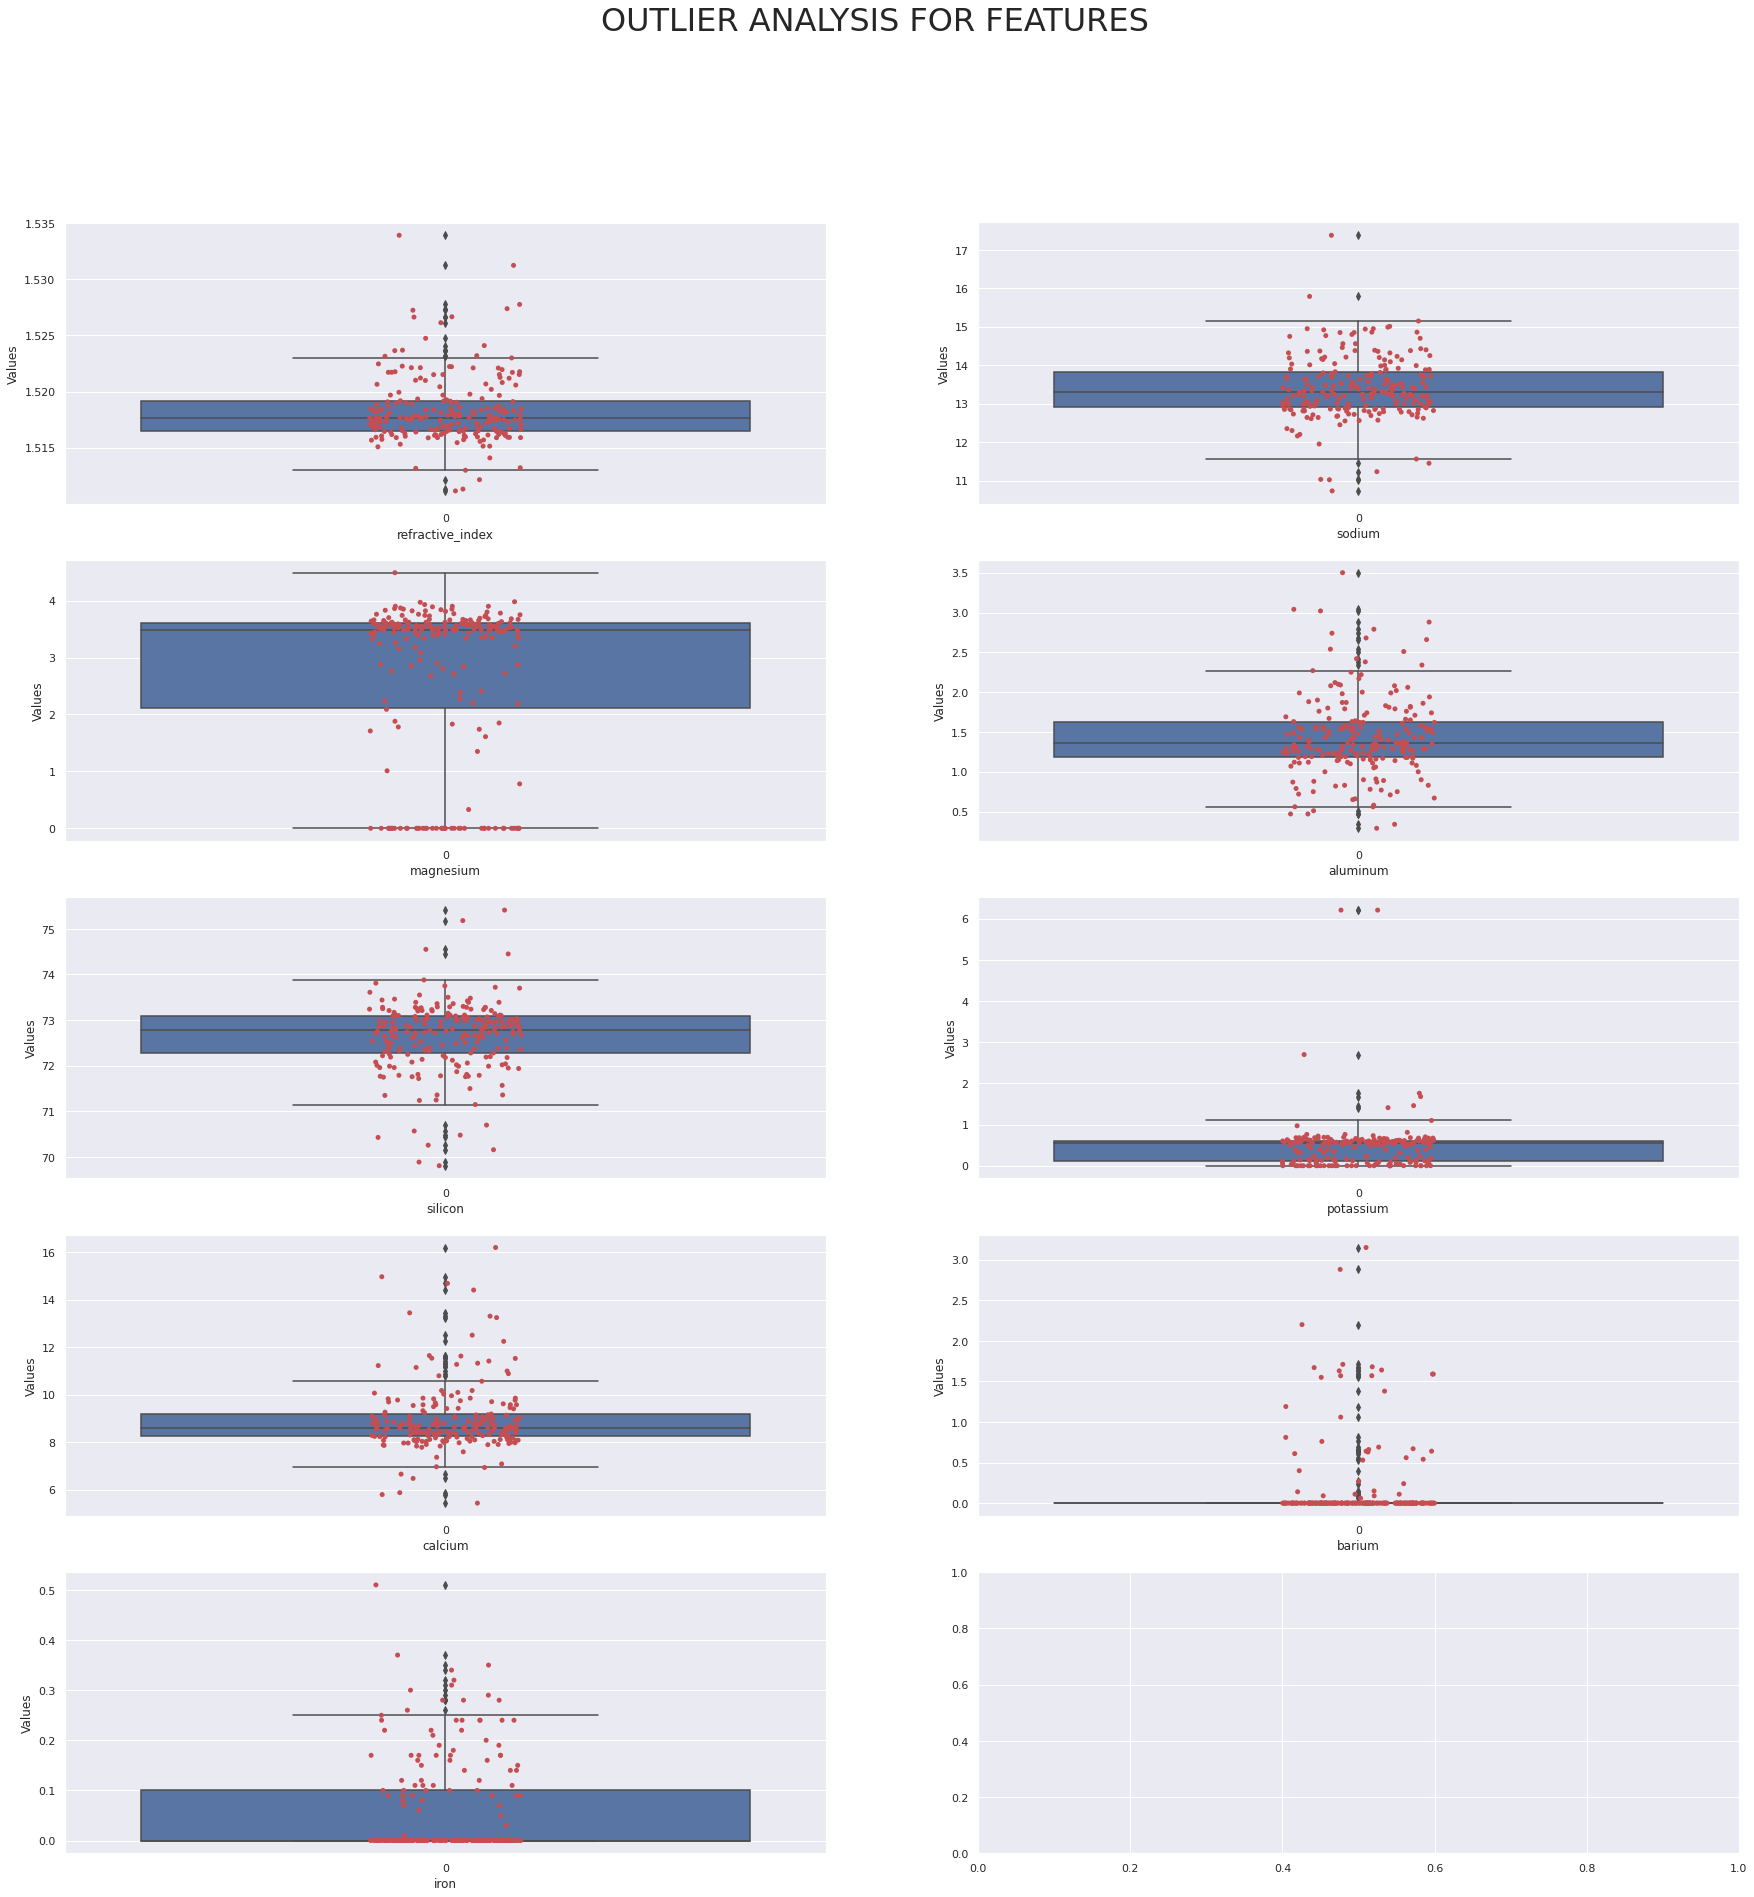

In [19]:
f, axes = plt.subplots(5, 2,figsize=(30, 30))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(data=X[X.columns[n]] ,ax=axes[i,j])
    #sns.swarmplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES', fontsize=32)
plt.show()

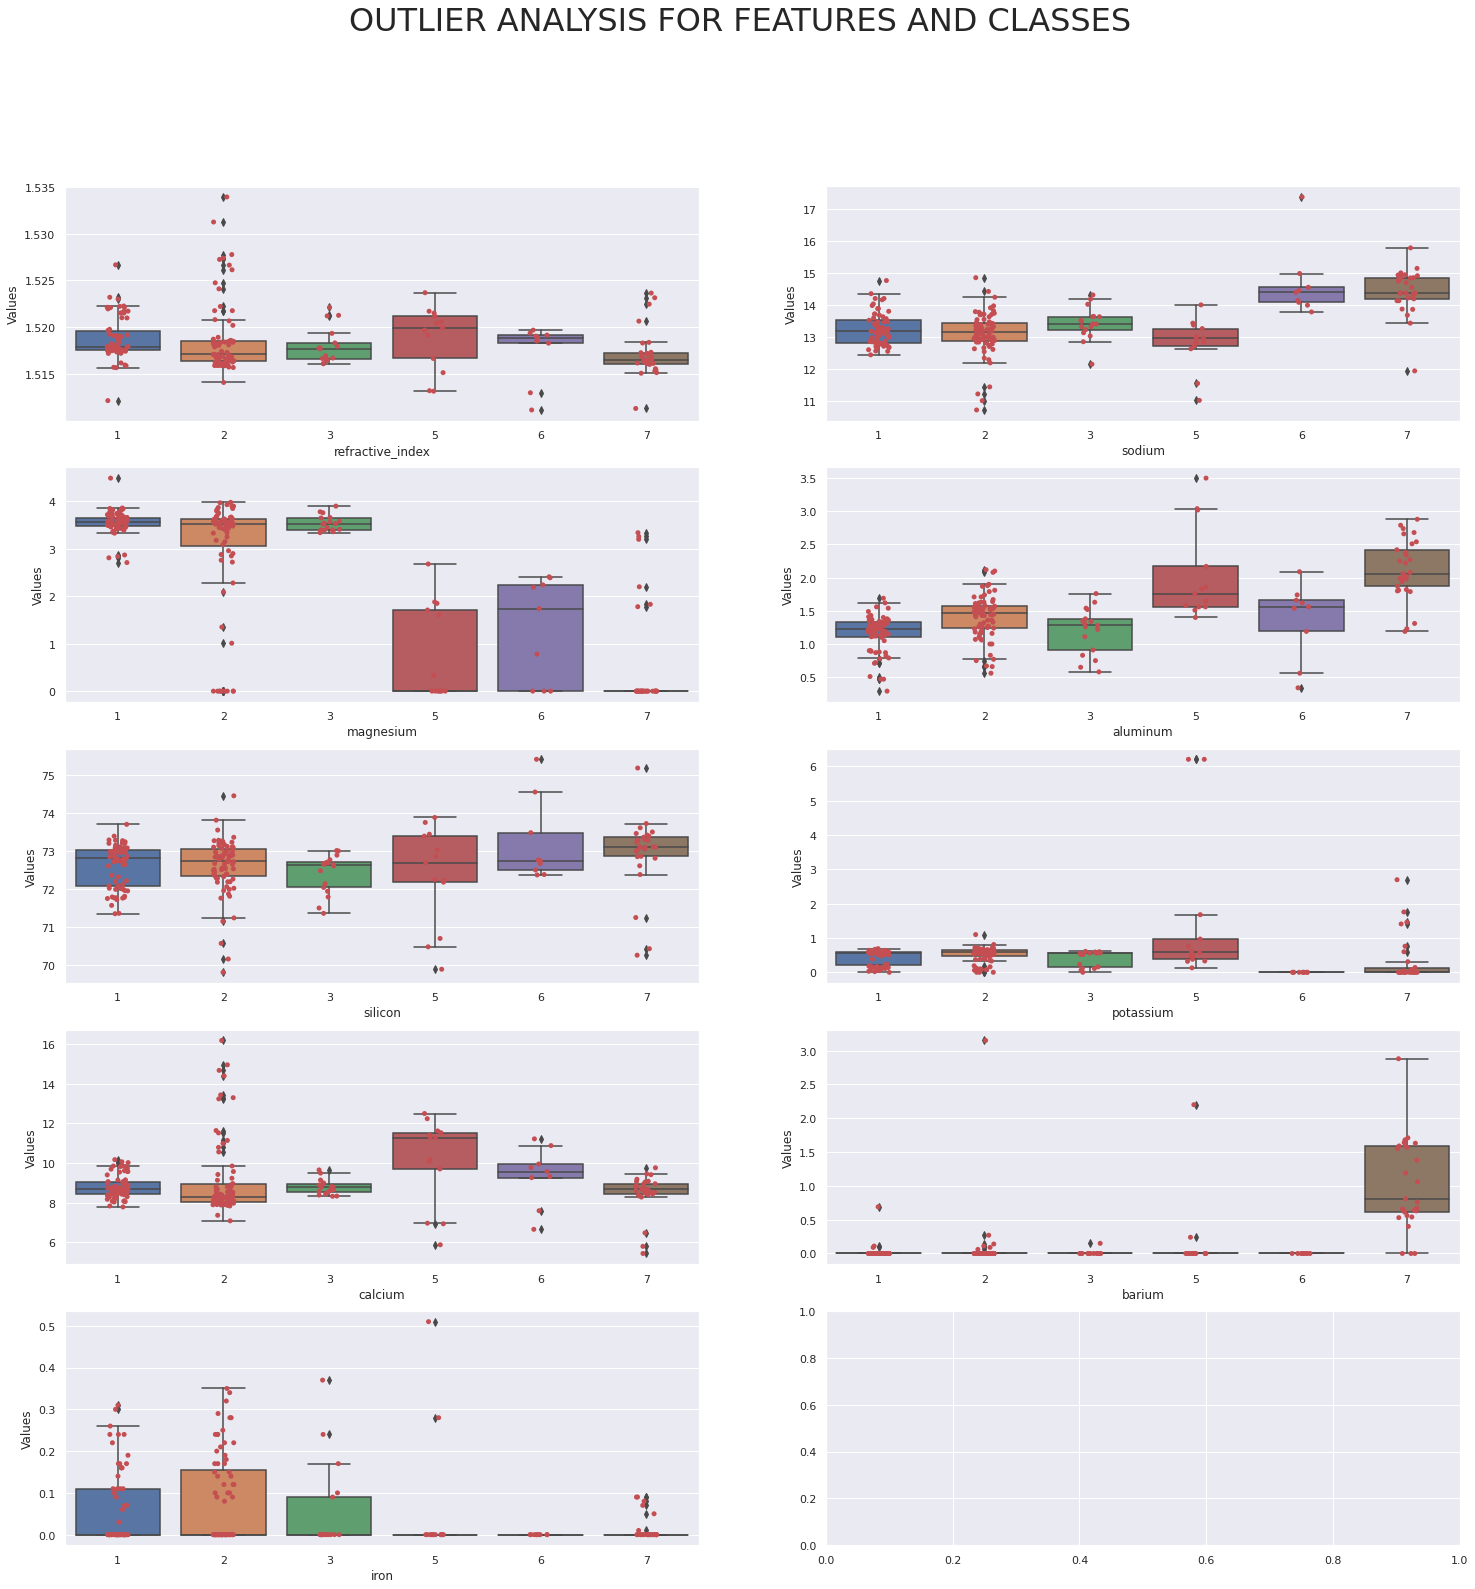

In [20]:

f, axes = plt.subplots(5, 2,figsize=(25, 25))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=Y['type_of_glass'],y=X[X.columns[n]],ax=axes[i,j])
    #sns.swarmplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES AND CLASSES', fontsize=32)
plt.show()

## Clean Outliers
### - Clean outliers class 1 and 2

In [476]:
dataframe_clean=dataframe.copy()

In [411]:
from collections import Counter
def outlier_hunt (df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(dataframe_clean[X.columns]))))   

The dataset contains 14 observations with more than 2 outliers


In [412]:
list_out=outlier_hunt(dataframe_clean[X.columns])
list_out

[103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]

In [413]:
dataframe_clean=dataframe_clean.drop(list_out)

In [111]:
def clean_outliers (df,feature,clas):
  df_aux=pd.DataFrame(df[feature][df.type_of_glass==clas])
  list_1=df_aux.index
  Q1 = df_aux.quantile(q=.25)
  Q3 = df_aux.quantile(q=.75)
  IQR = Q3-Q1
  df_clean = df_aux[~((df_aux < (Q1-1.20*IQR)) | (df_aux > (Q3+1.20*IQR))).any(axis=1)]
  list_2=df_clean.index
  list_outliers=np.setdiff1d(list_1,list_2)
  return df.drop(list_outliers)


In [112]:
for feature in X.columns:
  for clas in list(['1','2','7']):
    dataframe_clean=clean_outliers(dataframe_clean,feature,clas)

In [414]:
dataframe_clean

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### - Clean ouliers all classes

In [336]:
dataframe_clean=pd.DataFrame()
#df_clean_concat=pd.DataFrame()
for feature in X.columns:
  df_clean_concat=pd.DataFrame()
  for clas in Y.type_of_glass.unique():
    #aux=dataframe.feature[dataframe.type_of_glass==clas]
    #print(feature,' : ',clas)
    df_aux=pd.DataFrame(dataframe[feature][dataframe.type_of_glass==clas])
    #find Q1, Q3, and interquartile range for each column
    Q1 = df_aux.quantile(q=.25)
    Q3 = df_aux.quantile(q=.75)
    IQR = Q3-Q1#df_aux.apply(stats.iqr)

    
    df_clean = df_aux[~((df_aux < (Q1-1.5*IQR)) | (df_aux > (Q3+1.5*IQR))).any(axis=1)]
    df_clean_concat=pd.concat([df_clean_concat,df_clean], axis=0)
    
  dataframe_clean=pd.concat([dataframe_clean,df_clean_concat], axis=1)

dataframe_clean=pd.concat([dataframe_clean,Y], axis=1)



In [94]:
dataframe_clean

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.0,1
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
dataframe_clean.isna().sum()

refractive_index    12
sodium              11
magnesium            8
aluminum             8
silicon              8
potassium            4
calcium              9
barium              10
iron                 8
type_of_glass        0
dtype: int64

In [ ]:
dataframe_clean.dropna(inplace=True)
dataframe_clean.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:
print(dataframe_clean.shape)
dataframe_clean

(71, 10)


,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
...,...,...,...,...,...,...,...,...,...,...
108,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
110,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2
111,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00,3
112,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1


## We separate the features and the target in different dataframes
### - Dataframe features ("matrix X_clean")

In [415]:
X_clean=dataframe_clean.drop(columns='type_of_glass')
X_clean

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### - Dataframe target variable ('Y_clean')

In [416]:
Y_clean=dataframe_clean.loc[:,['type_of_glass']]
Y_clean

,type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


### - New target variable distribution

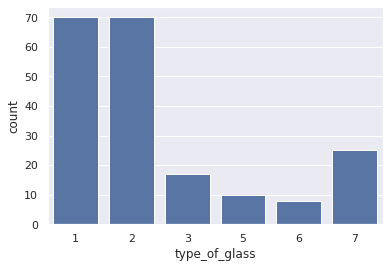

2    70
1    70
7    25
3    17
5    10
6     8
Name: type_of_glass, dtype: int64


In [204]:
sns.set_theme(style="darkgrid")
sns.countplot(x=Y_clean['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(Y_clean['type_of_glass'], sort = True))

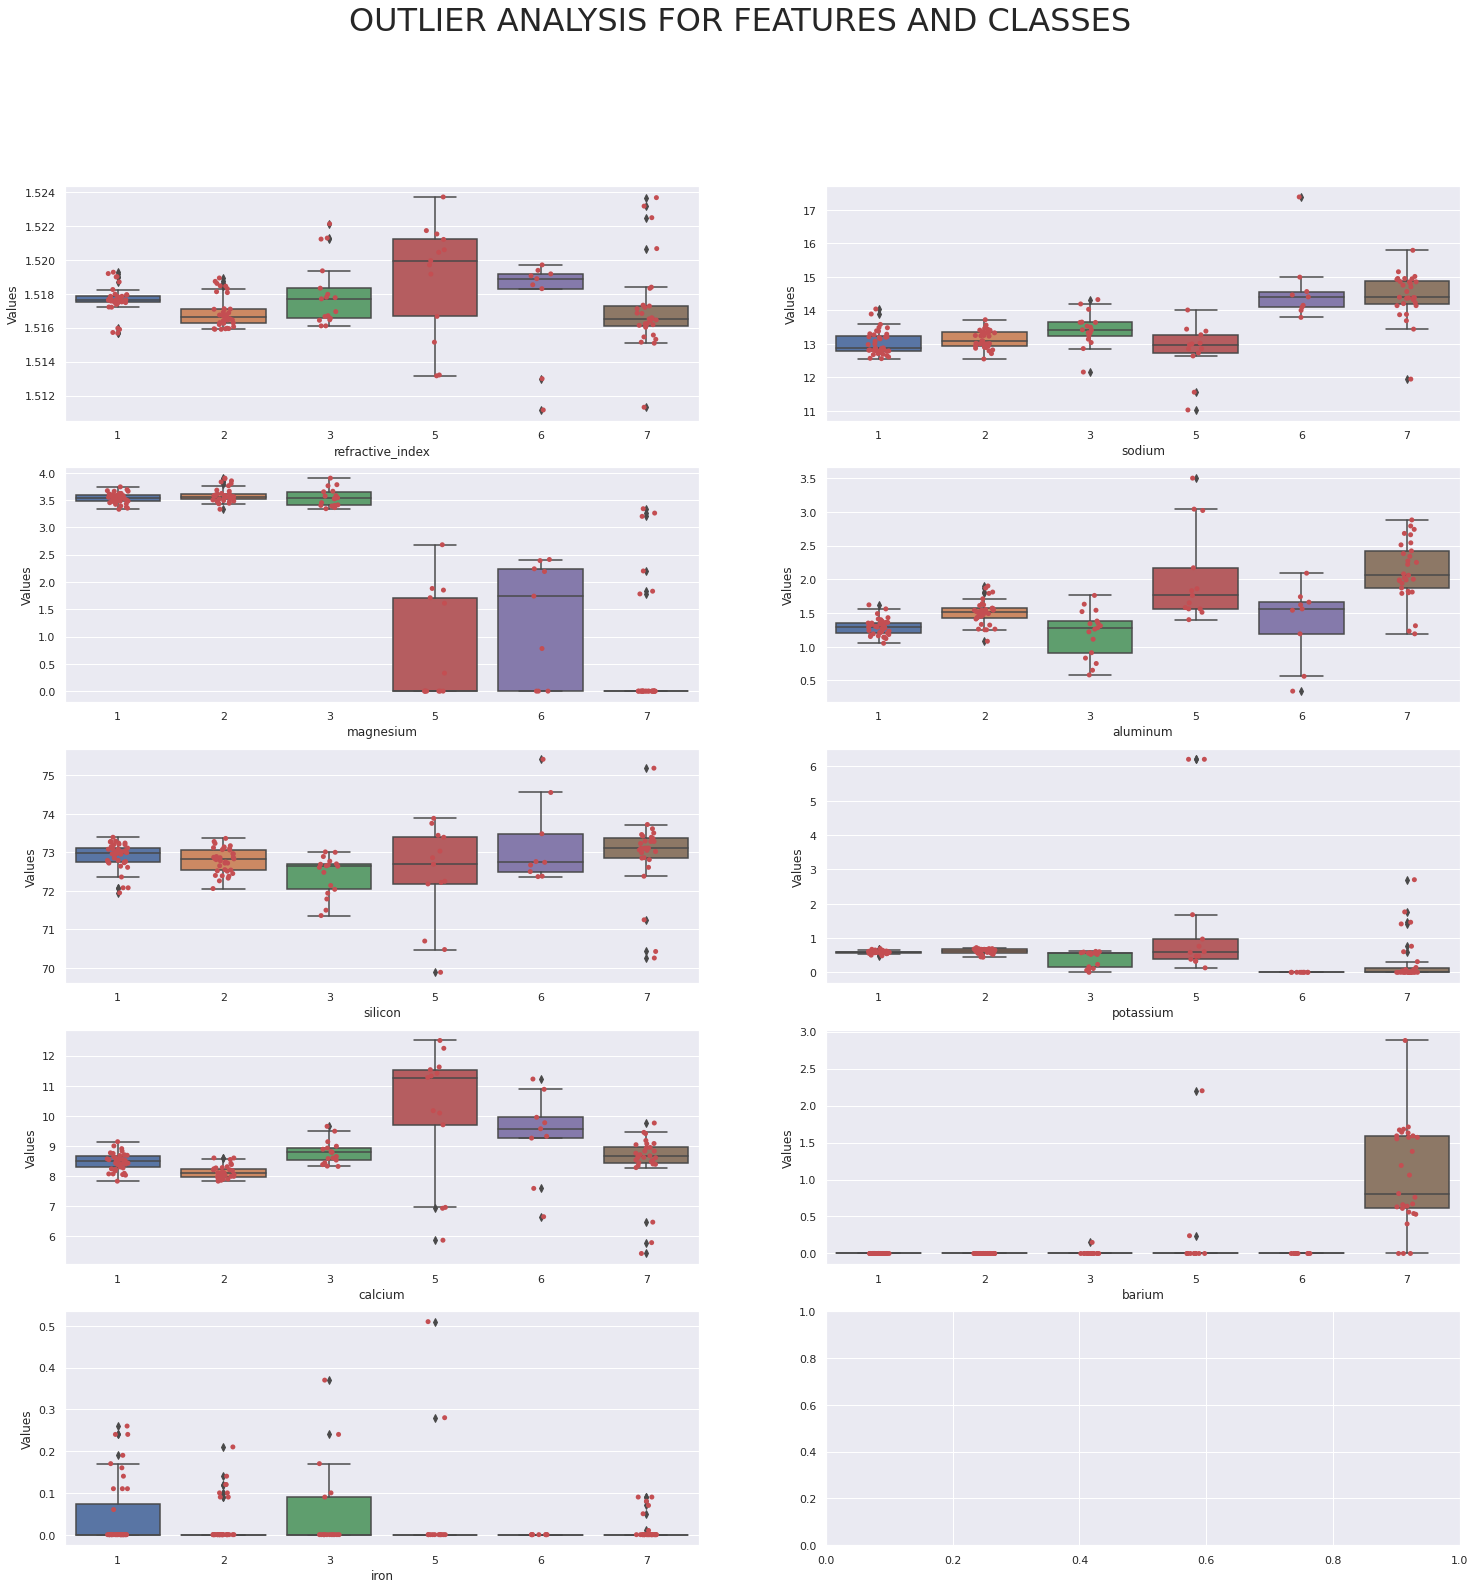

In [402]:
f, axes = plt.subplots(5, 2,figsize=(25, 25))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=Y['type_of_glass'],y=X_clean[X_clean.columns[n]],ax=axes[i,j])
    #sns.swarmplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(x=Y['type_of_glass'],y=X_clean[X_clean.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X_clean.columns[n], ylabel='Values')
    n+=1
    if n==len(X_clean.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES AND CLASSES', fontsize=32)
plt.show()

## Train Test Split

In [422]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.3)

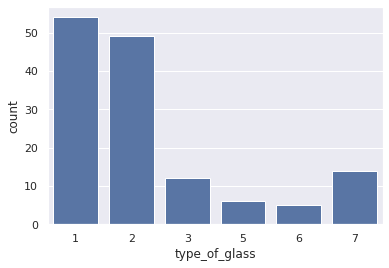

1    54
2    49
7    14
3    12
5     6
6     5
Name: type_of_glass, dtype: int64


In [423]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_train['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(y_train['type_of_glass'], sort = True))

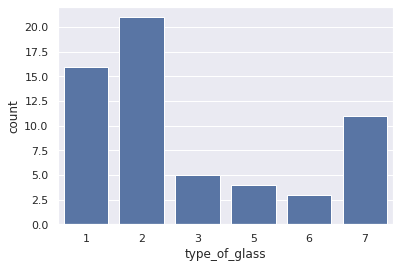

2    21
1    16
7    11
3     5
5     4
6     3
Name: type_of_glass, dtype: int64


In [424]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_test['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(y_test['type_of_glass'], sort = True))

## Normalize numeric features
### - StandardScaler of Sklearn to X_train

In [425]:
#scaler=StandardScaler()
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [426]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
X_train_scaled.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
81,0.241997,0.538835,0.768374,0.440154,0.591463,0.225926,0.106557,0.0,0.000000
113,0.433419,0.589806,0.853007,0.374517,0.465447,0.211111,0.154372,0.0,0.274510
118,0.293214,0.550971,0.810690,0.478764,0.461382,0.240741,0.129781,0.0,0.568627
151,0.583867,0.798544,0.868597,0.208494,0.252033,0.000000,0.329235,0.0,0.000000
8,0.450064,0.730583,0.797327,0.416988,0.369919,0.207407,0.166667,0.0,0.000000


### - Normalize X_test

In [427]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
X_test_scaled.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
50,0.707426,0.652913,0.828508,0.084942,0.302846,0.033333,0.407104,0.0,0.313725
133,0.374520,0.650485,0.875278,0.482625,0.315041,0.200000,0.154372,0.0,0.294118
37,0.372599,0.415049,0.775056,0.409266,0.548780,0.237037,0.218579,0.0,0.000000
155,0.275928,0.487864,0.757238,0.374517,0.558943,0.192593,0.204918,0.0,0.000000
19,0.332907,0.483010,0.788419,0.540541,0.502033,0.200000,0.185792,0.0,0.137255


## Machine Learning
## Support Vectors Machine

### - Tunning model with GridSearchCV

In [ ]:
param_grid = {'kernel':['linear','poly','rbf'],'C': [1,2,3], 'gamma': ['scale',1,5],'class_weight': ['balanced']}#,'probability':[True]}
model = SVC()
                                      
cv = GridSearchCV(model, param_grid,cv=3,scoring=['f1_micro','balanced_accuracy'],refit='f1_micro')
#cv = GridSearchCV()

### - Train model

In [40]:
cv.fit(X_train_scaled, y_train)
cv.cv_results_

### - Best estimator

In [ ]:
cv.best_estimator_

SVC(C=3, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### - Metrics evaluation

In [ ]:
print('Accuaracy train: ',cv.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,cv.best_estimator_.predict(X_test_scaled),average='micro'))
print('Recall: ',recall_score(y_test,cv.best_estimator_.predict(X_test_scaled),average=None))
print('Precision: ',precision_score(y_test,cv.best_estimator_.predict(X_test_scaled),average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,cv.best_estimator_.predict(X_test_scaled)))

Accuaracy train:  0.8571428571428571
Accuaracy test:  0.6818181818181818
F1 score:  0.6818181818181818
Recall:  [0.66666667 0.71428571 0.         0.         1.         1.        ]
Precision:  [0.66666667 0.625      0.         0.         1.         1.        ]
Balanced Accuracy Score:  0.5634920634920635


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### - Bagging SVM

In [ ]:
model_bagging = BaggingClassifier(cv.best_estimator_, n_estimators=100, max_samples=40, max_features=6)

### - Train bagging model

In [ ]:
model_bagging.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingClassifier(base_estimator=SVC(C=3, break_ties=False, cache_size=200,
                                     class_weight='balanced', coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=6,
                  max_samples=40, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

### - Metrics evaluation bagging

In [ ]:
print('Accuaracy train: ',model_bagging.score(X_train_scaled, y_train))
print('Accuaracy test: ',model_bagging.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,model_bagging.predict(X_test_scaled),average='micro'))
print('Recall: ',recall_score(y_test,model_bagging.predict(X_test_scaled),average=None))
print('Precision: ',precision_score(y_test,model_bagging.predict(X_test_scaled),average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,model_bagging.predict(X_test_scaled)))

Accuaracy train:  0.8163265306122449
Accuaracy test:  0.6818181818181818
F1 score:  0.6818181818181818
Recall:  [0.66666667 0.71428571 0.         0.         1.         1.        ]
Precision:  [0.66666667 0.625      0.         0.         1.         1.        ]
Balanced Accuracy Score:  0.5634920634920635


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Random Forest

### - Tunning model with GridSearchCV

In [474]:
param_grid = {'n_estimators':[50],'max_samples': [None,6,10],'max_features': [3,4],'min_samples_split':[6,7,8,10] , 'criterion': ['entropy','gini'],'bootstrap':[False],'class_weight':['balanced','balanced_subsample']}
#model = RandomForestClassifier(n_estimators=50, max_samples=60, max_features=4,min_samples_split=4,bootstrap=False,criterion='entropy')
                                      
model_rf = RandomForestClassifier(random_state=123)
cv_rf = GridSearchCV(model_rf, param_grid,cv=8,scoring=['f1_micro','balanced_accuracy'],refit='balanced_accuracy')

### - Train RandomForest

In [475]:
cv_rf.fit(X_train_scaled, np.ravel(y_train))
cv_rf.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 5 members, which is less than n_splits=8.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/di

{'mean_fit_time': array([0.07676306, 0.07566032, 0.07696345, 0.07418382, 0.07738987,
        0.08007041, 0.07441717, 0.07409397, 0.07691795, 0.07695979,
        0.07585913, 0.07386175, 0.08408338, 0.0835492 , 0.08191955,
        0.08106771, 0.08519492, 0.08210456, 0.08050975, 0.07994536,
        0.08440068, 0.0845975 , 0.08045393, 0.07997665, 0.06157207,
        0.06090778, 0.06010449, 0.06132019, 0.06181407, 0.05932549,
        0.06123006, 0.06082773, 0.06194603, 0.06008321, 0.06209868,
        0.05972028, 0.06313336, 0.0649232 , 0.06308669, 0.06295294,
        0.06244114, 0.06419453, 0.06239721, 0.06350434, 0.06290117,
        0.06470773, 0.06286472, 0.06219649, 0.07786253, 0.07583505,
        0.07535681, 0.07526517, 0.07595327, 0.07618871, 0.07652381,
        0.07418421, 0.07801053, 0.07854187, 0.07430151, 0.07415587,
        0.08435717, 0.08135915, 0.08130693, 0.08022073, 0.0838798 ,
        0.08359423, 0.08032748, 0.07959223, 0.08474344, 0.08166954,
        0.08163118, 0.08069125,

### - Best estimator

In [470]:
cv_rf.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

### - Predict

In [471]:
y_pred=cv_rf.best_estimator_.predict(X_test_scaled)

### - Metrics evaluation

In [472]:
print('Accuaracy train: ',cv_rf.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv_rf.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,y_pred,average='micro'))
print('Recall: ',recall_score(y_test,y_pred,average=None))
print('Precision: ',precision_score(y_test,y_pred,average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,y_pred))

Accuaracy train:  1.0
Accuaracy test:  0.85
F1 score:  0.85
Recall:  [0.9375     0.76190476 0.6        1.         1.         0.90909091]
Precision:  [0.78947368 0.88888889 0.6        1.         1.         0.90909091]
Balanced Accuracy Score:  0.8680826118326119


In [467]:
print('Accuaracy train: ',cv_rf.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv_rf.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,y_pred,average='micro'))
print('Recall: ',recall_score(y_test,y_pred,average=None))
print('Precision: ',precision_score(y_test,y_pred,average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,y_pred))

Accuaracy train:  0.9857142857142858
Accuaracy test:  0.9
F1 score:  0.9
Recall:  [0.9375     0.9047619  0.6        1.         1.         0.90909091]
Precision:  [0.88235294 0.9047619  0.6        1.         1.         1.        ]
Balanced Accuracy Score:  0.8918921356421357


In [435]:
print('Accuaracy train: ',cv_rf.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv_rf.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,y_pred,average='micro'))
print('Recall: ',recall_score(y_test,y_pred,average=None))
print('Precision: ',precision_score(y_test,y_pred,average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,y_pred))

Accuaracy train:  1.0
Accuaracy test:  1.0
F1 score:  1.0
Recall:  [1. 1. 1. 1. 1. 1.]
Precision:  [1. 1. 1. 1. 1. 1.]
Balanced Accuracy Score:  1.0


In [275]:
print('Accuaracy train: ',cv_rf.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv_rf.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,y_pred,average='micro'))
print('Recall: ',recall_score(y_test,y_pred,average=None))
print('Precision: ',precision_score(y_test,y_pred,average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,y_pred))

Accuaracy train:  0.97
Accuaracy test:  0.9302325581395349
F1 score:  0.9302325581395349
Recall:  [0.83333333 1.         1.         1.         1.         1.        ]
Precision:  [1.         1.         0.57142857 1.         1.         1.        ]
Balanced Accuracy Score:  0.9722222222222223


In [377]:
y_test['type_of_glass'].unique()


array(['7', '2', '1', '5', '3', '6'], dtype=object)

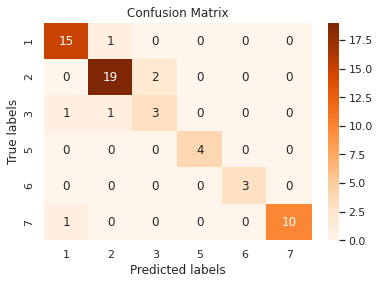

In [466]:
conmatrix_rf=confusion_matrix(y_test,y_pred)
df_cm =pd.DataFrame(conmatrix_rf, index=sorted(y_test['type_of_glass'].unique()), columns=sorted(y_test['type_of_glass'].unique()))
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

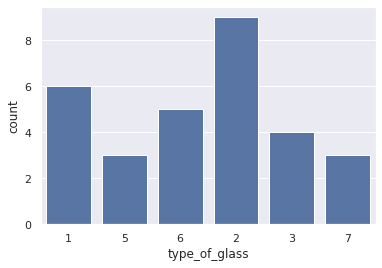

2    9
1    6
6    5
3    4
7    3
5    3
Name: type_of_glass, dtype: int64


In [129]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_test['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(y_test['type_of_glass'], sort = True))

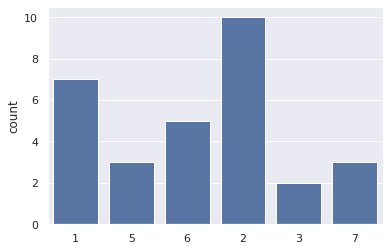

2    10
1     7
6     5
7     3
5     3
3     2
dtype: int64


In [130]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_pred,color='b')
plt.show()
print(pd.value_counts(y_pred, sort = True))

In [464]:
import pickle

with open("modelo.pkl", "wb") as f:
    pickle.dump(cv_rf.best_estimator_, f)

In [465]:
with open("modelo.pkl", "rb") as f:
    modelo_pickle = pickle.load(f)

modelo_pickle

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

## UNDERSAMPLING
### Train Test Split to Undersampling

In [417]:
np.random.seed(123)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_clean, Y_clean, test_size=0.3)

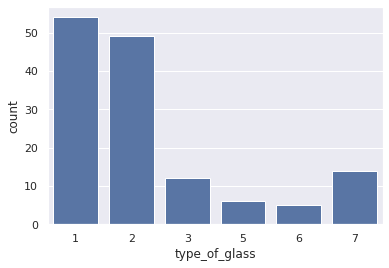

1    54
2    49
7    14
3    12
5     6
6     5
Name: type_of_glass, dtype: int64


In [418]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_train_under['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(y_train_under['type_of_glass'], sort = True))

### - Undersampling Multiclass

In [421]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_under_balan, y_train_under_balan = oversample.fit_resample(X_train_under,np.ravel(y_train_under))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



ValueError: ignored

In [406]:
sns.set_theme(style="darkgrid")
sns.countplot(x=y_train_under_balan,color='b')
plt.show()
print(pd.value_counts(y_train_under_balan, sort = True))

NameError: ignored

## Normalize numeric features
### - MinMAxScaler of Sklearn to X_train_under

In [225]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train_under_balan)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [228]:
X_train_scaled_under = pd.DataFrame(scaler.transform(X_train_under_balan) ,columns = X_train_under.columns)
X_train_scaled_under.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,0.996810,0.726804,0.469231,0.306962,0.097826,0.049919,0.420268,0.763636,0.000000
1,0.587719,0.434708,0.561538,0.417722,0.503623,0.000000,0.526080,0.000000,0.000000
2,0.653110,0.357388,0.907692,0.129747,0.500000,0.025765,0.461997,0.068182,0.648649
3,0.473684,0.247423,0.889744,0.458861,0.512681,0.106280,0.356185,0.000000,0.000000
4,0.681021,0.515464,0.000000,0.069620,0.650362,0.000000,0.809240,0.000000,0.000000


### - Normalize X_test_under

In [229]:
X_test_scaled_under = pd.DataFrame(scaler.transform(X_test_under),index=X_test_under.index, columns = X_test_under.columns)
X_test_scaled_under.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
207,0.570973,0.486254,0.000000,0.468354,0.538043,0.227053,0.101341,1.309091,0.0
199,0.393939,0.592784,0.000000,0.686709,0.572464,0.008052,0.453055,0.240909,0.0
185,0.012759,0.365979,0.820513,0.465190,0.528986,0.283414,-0.053651,0.540909,0.0
77,0.408293,0.247423,0.917949,0.379747,0.532609,0.098229,0.335320,0.000000,0.0
41,0.510367,0.197595,0.876923,0.272152,0.599638,0.095008,0.424739,0.000000,0.0


## Random Forest with previous Undersampling
### - Tunning model with GridSearchCV

In [241]:
param_grid = {'n_estimators':[100],'max_samples': [16,17], 'max_features': [3,4],'min_samples_split':[8,9] , 'criterion': ['entropy','gini'],'bootstrap':[False]}
#model = RandomForestClassifier(n_estimators=50, max_samples=60, max_features=4,min_samples_split=4,bootstrap=False,criterion='entropy')
                                      
model_rf_under = RandomForestClassifier(random_state=123)
cv_rf_under = GridSearchCV(model_rf_under, param_grid,cv=5)

### - Train RandomForest

In [242]:
cv_rf_under.fit(X_train_scaled_under, y_train_under_balan)
cv_rf_under.cv_results_

{'mean_fit_time': array([0.13511038, 0.13440557, 0.12891278, 0.12987294, 0.14178319,
        0.13980455, 0.13930268, 0.1409164 , 0.10349579, 0.10324693,
        0.1043047 , 0.10283604, 0.10824485, 0.10620227, 0.1122869 ,
        0.10819149]),
 'mean_score_time': array([0.00927424, 0.00912499, 0.00967646, 0.00918136, 0.00897593,
        0.00907855, 0.00916739, 0.00910826, 0.00896478, 0.00913949,
        0.00928965, 0.00905542, 0.00949888, 0.00891685, 0.00991621,
        0.00933838]),
 'mean_test_score': array([0.90776515, 0.90189394, 0.90776515, 0.90189394, 0.88314394,
        0.88939394, 0.88314394, 0.88939394, 0.91420455, 0.90814394,
        0.91420455, 0.90814394, 0.89564394, 0.90189394, 0.89564394,
        0.90189394]),
 'param_bootstrap': masked_array(data=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False,
                   

In [243]:
cv_rf_under.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [244]:
y_pred_under=cv_rf_under.best_estimator_.predict(X_test_scaled_under)

In [251]:
print('Accuaracy train: ',cv_rf_under.best_estimator_.score(X_train_scaled_under, y_train_under_balan))
print('Accuaracy test: ',cv_rf_under.best_estimator_.score(X_test_scaled_under, y_test_under))
print('F1 score: ',f1_score(y_test_under,y_pred_under,average=None))
print('F1 score (micro): ',f1_score(y_test_under,y_pred_under,average='micro'))
print('F1 score (weighted): ',f1_score(y_test_under,y_pred_under,average='weighted'))
print('Recall: ',recall_score(y_test_under,y_pred_under,average=None))
print('Precision: ',precision_score(y_test_under,y_pred_under,average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test_under,y_pred_under))

Accuaracy train:  1.0
Accuaracy test:  0.9069767441860465
F1 score:  [0.90909091 1.         0.72727273 0.8        1.         0.94736842]
F1 score (micro):  0.9069767441860465
F1 score (weighted):  0.915032825191944
Recall:  [0.83333333 1.         1.         1.         1.         0.9       ]
Precision:  [1.         1.         0.57142857 0.66666667 1.         1.        ]
Balanced Accuracy Score:  0.9555555555555557


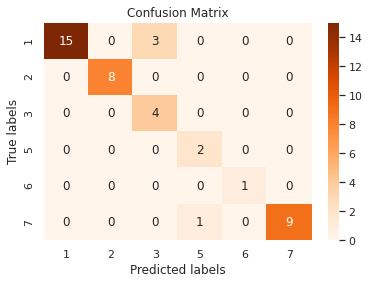

In [296]:
conmatrix_rf=confusion_matrix(y_test_under,y_pred_under)
df_cm =pd.DataFrame(conmatrix_rf, index=sorted(y_test_under['type_of_glass'].unique()), columns=sorted(y_test_under['type_of_glass'].unique()))
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 